Before SMOTE: Counter({'Underweight': 47, 'Normal Weight': 35, 'Overweight': 17, 'Obese': 9})
After SMOTE: Counter({'Normal Weight': 47, 'Overweight': 47, 'Underweight': 47, 'Obese': 47})


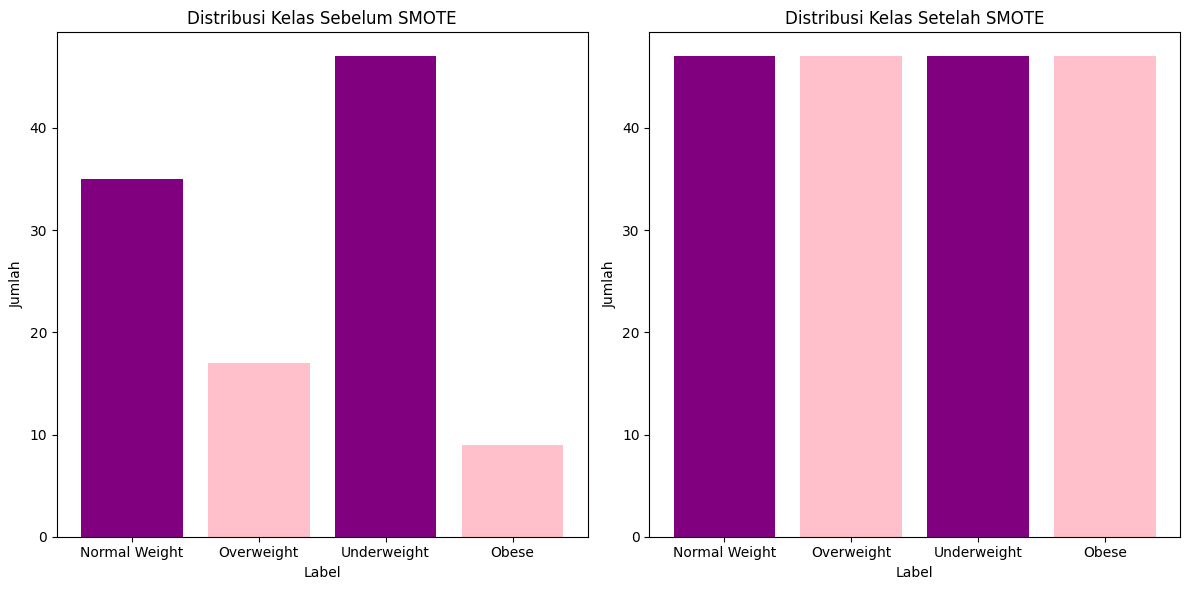

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("Obesity Classification_imbalance.csv")

# Pisahkan fitur dan target
X = data.drop('Label', axis=1)
y = data['Label']

# Encode fitur kategorikal menjadi numerik
encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

# Hitung distribusi kelas sebelum SMOTE
counter_before = Counter(y)
print('Before SMOTE:', counter_before)

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_smote, y_smote = smt.fit_resample(X, y)

# Hitung distribusi kelas setelah SMOTE
counter_after = Counter(y_smote)
print('After SMOTE:', counter_after)

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE menggunakan bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sebelum SMOTE
ax[0].bar(counter_before.keys(), counter_before.values(), color=['purple', 'pink'])
ax[0].set_title('Distribusi Kelas Sebelum SMOTE')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Jumlah')

# Setelah SMOTE
ax[1].bar(counter_after.keys(), counter_after.values(), color=['purple', 'pink'])
ax[1].set_title('Distribusi Kelas Setelah SMOTE')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Jumlah')

# Tampilkan plot
plt.tight_layout()
plt.show()

Distribusi kelas sebelum resampling: Counter({3: 47, 0: 35, 2: 17, 1: 9})
Distribusi kelas setelah resampling: Counter({1: 42, 3: 33, 2: 30, 0: 24})


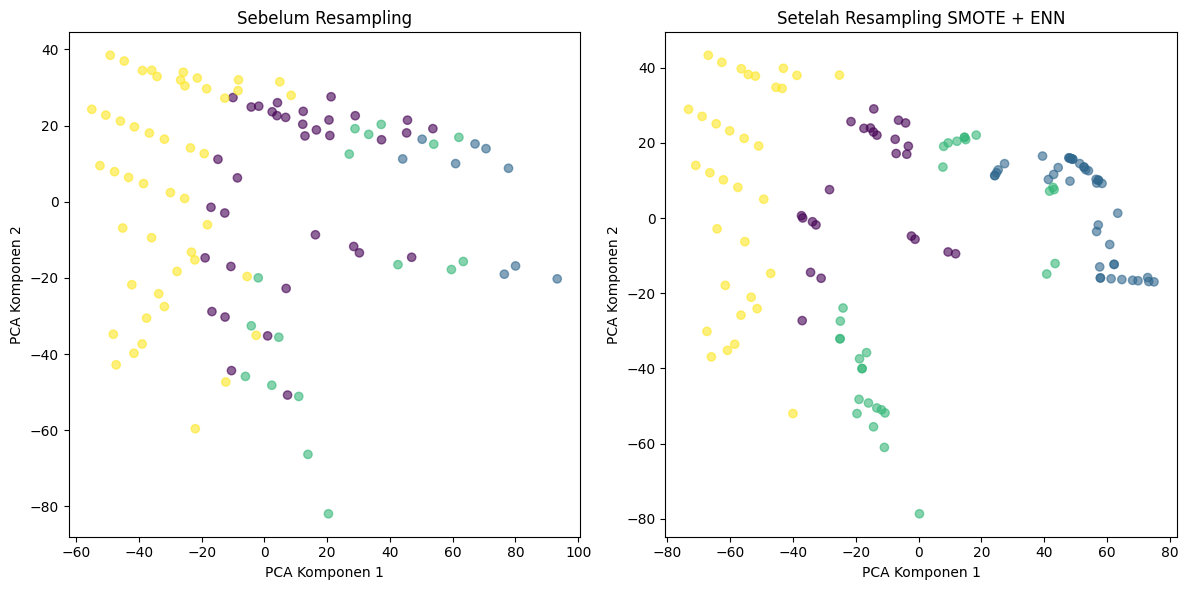

In [6]:
# Install imblearn dan matplotlib jika belum terinstall
# !pip install imbalanced-learn matplotlib scikit-learn

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTEENN
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Muat dataset
file_path = 'Obesity Classification_imbalance.csv'
data = pd.read_csv(file_path)

# Encode kolom 'Gender' (kategorikal)
gender_encoder = LabelEncoder()
data['Gender'] = gender_encoder.fit_transform(data['Gender'])

# Encode kolom 'Label' (target)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Pisahkan fitur (X) dan target (y)
X = data.drop(['ID', 'Label'], axis=1)  # Gunakan semua kolom kecuali ID dan Label
y = data['Label']

# Lihat distribusi kelas sebelum resampling
print(f"Distribusi kelas sebelum resampling: {Counter(y)}")

# Inisialisasi SMOTEENN dan resampling
smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=3), random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Lihat distribusi kelas setelah resampling
print(f"Distribusi kelas setelah resampling: {Counter(y_resampled)}")

# Visualisasi menggunakan PCA (2 komponen utama)
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X)  # Data sebelum resampling
X_pca_after = pca.fit_transform(X_resampled)  # Data setelah resampling

# Plot data sebelum resampling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('Sebelum Resampling')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')

# Plot data setelah resampling
plt.subplot(1, 2, 2)
plt.scatter(X_pca_after[:, 0], X_pca_after[:, 1], c=y_resampled, cmap='viridis', alpha=0.6)
plt.title('Setelah Resampling SMOTE + ENN')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("Obesity Classification_imbalance.csv")

# Pisahkan fitur dan target
X = data.drop('Label', axis=1)
y = data['Label']

# Encode categorical features (Gender and Label if needed)
encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

# Encode target variable 'Label'
y = encoder.fit_transform(y)

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Metode 1: Resampling menggunakan SMOTE dengan n_neighbors lebih kecil
smote = SMOTE(random_state=42, k_neighbors=3)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train, y_train)

# Metode 2: Resampling menggunakan SMOTE + ENN dengan n_neighbors lebih kecil
smote_enn = SMOTEENN(smote=SMOTE(k_neighbors=3), random_state=42)
X_smote_enn_resampled, y_smote_enn_resampled = smote_enn.fit_resample(X_train, y_train)

# Model evaluasi dengan RandomForestClassifier
def evaluate_model(X_train_resampled, y_train_resampled, X_test, y_test, model_name):
    # Inisialisasi model
    model = RandomForestClassifier(random_state=42)
    
    # Latih model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Prediksi
    y_pred = model.predict(X_test)
    
    # Evaluasi performa
    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    print("-" * 60)

# Evaluasi performa model dengan SMOTE
evaluate_model(X_smote_resampled, y_smote_resampled, X_test, y_test, "SMOTE")

# Evaluasi performa model dengan SMOTE + ENN
evaluate_model(X_smote_enn_resampled, y_smote_enn_resampled, X_test, y_test, "SMOTE + ENN")


Evaluasi Model: SMOTE
Akurasi: 0.8182
               precision    recall  f1-score   support

Normal Weight       0.80      0.89      0.84         9
        Obese       1.00      0.40      0.57         5
   Overweight       0.50      0.67      0.57         6
  Underweight       1.00      1.00      1.00        13

     accuracy                           0.82        33
    macro avg       0.82      0.74      0.75        33
 weighted avg       0.85      0.82      0.81        33

------------------------------------------------------------
Evaluasi Model: SMOTE + ENN
Akurasi: 0.6061
               precision    recall  f1-score   support

Normal Weight       0.44      0.44      0.44         9
        Obese       1.00      0.40      0.57         5
   Overweight       0.33      0.67      0.44         6
  Underweight       1.00      0.77      0.87        13

     accuracy                           0.61        33
    macro avg       0.69      0.57      0.58        33
 weighted avg       0.73   